# Bay Wheels's trip data analysis
#### By Ayman El Taweel 

## Investigation Overview

 1) Average of trips duration.
 
 2) When trips' count increases in terms of ( hours - days - months ) 
 
 3) Bay wheel's popular user_type.
 
 4) The effect of user_types on trips' duration.

## Dataset Overview
 > *We are going to get some of Wheels's trip dataset insights which includes data about each trip such as : duration, start time and place, end time and place and customer categories as well.*aset to be presented here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
## We will make the column names all in small letters and replace any space by '_'

df.rename(columns=lambda x : x.strip().lower().replace(' ','_'),inplace = True)

In [4]:
## Dropping unneeded columns
df.drop(['start_station_id'],axis=1,inplace=True)
df.drop(['end_station_id'],axis=1,inplace=True)
df.head(2)

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,Laguna St at Hayes St,37.776435,-122.426244,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,Dolores St at 15th St,37.766210,-122.426614,88,Customer


In [5]:
## Converting time columns into its right type

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

## Checking the change 

df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
dtype: object

In [6]:
## Getting the count of null values in each column
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [7]:
## Getting the count of duplicates in our dataset

df.duplicated().sum()

0

In [8]:
# defining a function to return (( month)) when each trip had started

def get_month(x):
    return x.month

# creating a column for trip start month
df['start_month'] = df['start_time'].map(get_month)


# Checking the new column values
df.start_month.value_counts()

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: start_month, dtype: int64

In [9]:
# defining a function to return (( day )) when each trip had started

df['start_day'] = df['start_time'].dt.dayofweek

def dayName(weekday):
    if weekday == 0:
        return "Monday"
    if weekday == 1:
        return "Tuesday"
    if weekday == 2:
        return "Wednesday"
    if weekday == 3:
        return "Thursday"
    if weekday == 4:
        return "Friday"
    if weekday == 5:
        return "Saturday"
    if weekday == 6:
        return "Sunday"
df[['start_day']] = df['start_day'].map(dayName)

## checking the new column values


df['start_day'].value_counts()

Tuesday      87865
Wednesday    87752
Thursday     85243
Monday       81410
Friday       81165
Saturday     50874
Sunday       45391
Name: start_day, dtype: int64

In [10]:
# defining a function to return (( hour )) when each trip had started

def get_hour(x):
    return x.hour

# creating a column for trip start month
df['start_hour'] = df['start_time'].map(get_hour)


# Checking the new column values
df.start_hour.value_counts()

17    60111
8     57227
18    46088
9     45457
16    41339
15    28448
12    27448
13    27374
7     26800
19    26598
10    25217
14    24900
11    24303
20    16642
21    11993
6      8895
22     7967
23     4867
0      2606
5      2145
1      1377
2       860
4       640
3       398
Name: start_hour, dtype: int64

In [11]:
# Converting column values to be in minutes
df.duration_sec=df.duration_sec / 60

# Renaming the column to be relevant
df.rename(columns = {'duration_sec':'duration_minutes'}, inplace = True) 

# Checking the results
df.head(2)

,duration_minutes,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_month,start_day,start_hour
0,1335.166667,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,Laguna St at Hayes St,37.776435,-122.426244,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,12,Sunday,16
1,1313.333333,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,Dolores St at 15th St,37.766210,-122.426614,88,Customer,12,Sunday,15


In [12]:
## Defining a function that labels plot axes and tile easily

def plotinfo( x , y , z) :
    return plt.xlabel(x , fontsize = 10),plt.ylabel(y,fontsize = 10),plt.title(z , fontsize = 20)

## How much do most trips last? 

<font color='blue'>Most trips last from 5 to 20 minutes. This may be an inference that most people use bikes as quick transportation mean for only near location.</font> 

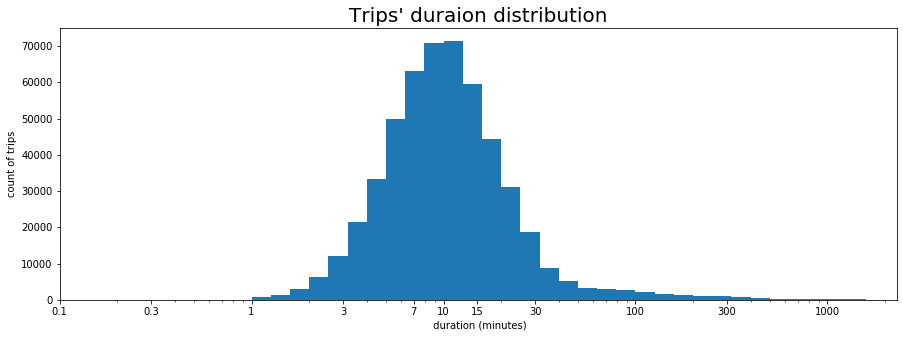

In [13]:
### Duration histogram
plt.figure( figsize = ( 15,5));

# Transforming the scalue to overcome overplotting
bins = 10 ** np.arange(0,3.16+0.1,0.1)
ticks = [0.1 , 0.3 , 1, 3 , 7 , 10 , 15 , 30 , 100 , 300 , 1000 ]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_minutes', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);
plotinfo ( ' duration (minutes)' , 'count of trips' , "Trips' duraion distribution");

### When did most trips start ?

#### *As, we can see trips count increases around<font color='blue'> 8AM and 5PM </font>* 
#### *This may be beacause people go and return from their <font color='blue'> workplaces, schools </font> and so on at these times.*
#### *So, Bay Wheels's should make sure of bikes <font color='blue'> availability </font> at these times in order to keep<font color='blue'>  satisfying </font>  its customers.*

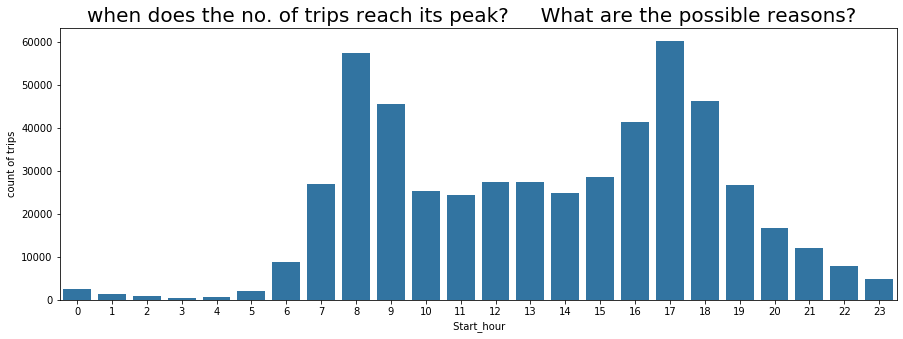

In [14]:
### Start_hour plot
plt.figure( figsize = ( 15,5));
base_color = sb.color_palette()[0]
sb.countplot( data = df , x = 'start_hour',color = base_color );
plotinfo ( ' Start_hour' , 'count of trips' , 'when does the no. of trips reach its peak?     What are the possible reasons?  ');

###  Do days of week have effects on trips' count ? 

#### *As we can see that the number of trips experience a noticeable <font color='blue'> decrease </font> on both "sunday and saturday". This makes sense as they are the <font color='blue'> weekly vacation </font>.*

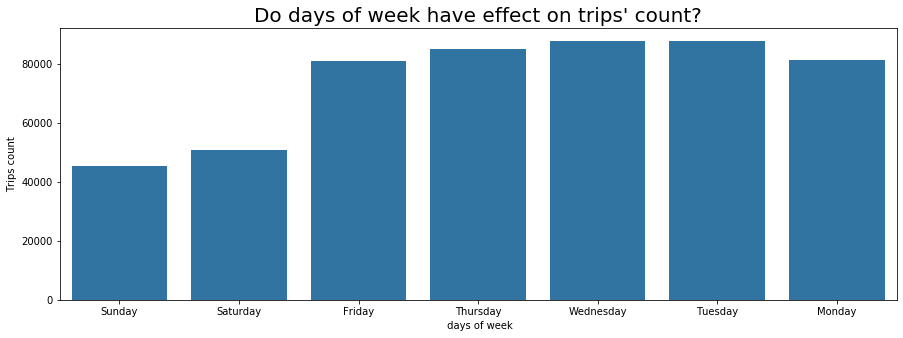

In [15]:
## start_day 

plt.figure( figsize = ( 15,5));
base_color = sb.color_palette()[0];
sb.countplot( data = df , x = 'start_day' ,color = base_color );
plotinfo(' days of week' , 'Trips count' , "Do days of week have effect on trips' count?" );

### What was the trips' count trend over months? WHY ?

#### *It's crystal clear that there are no trips in the period from <font color='blue'> January to May </font> ,inclusive, In other words, No trips starts in winter, May be beacuse of snow in the streets.*

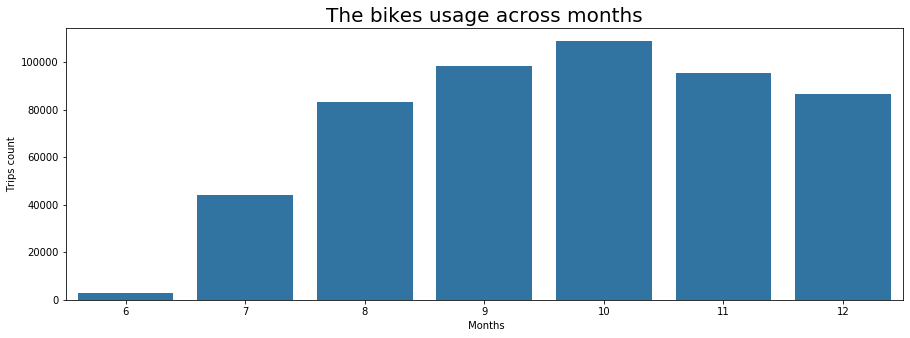

In [16]:
## start_month plot

plt.figure( figsize = ( 15,5));
base_color = sb.color_palette()[0];
sb.countplot( data = df , x = 'start_month' ,color = base_color);
plotinfo(' Months' , 'Trips count' , "The bikes usage across months" );

### What is Bay Wheels's more poplular user_type?

#### *The number of trips carried out by subscribers are nearly <font color='blue'> 4 times </font> as of non-subscribers. So, Subscribers are more important for Bay Wheels's.*

#### *Also, This ratio makes sense as frequent users tend to subscribe beacause of economic perspective.*

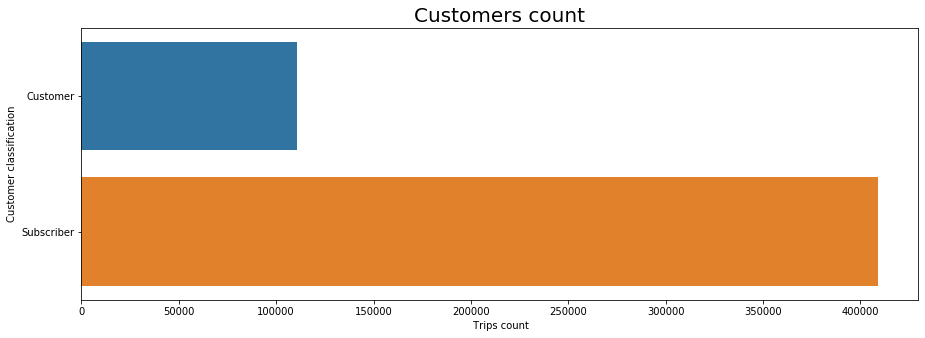

In [17]:
## user classification plot

plt.figure( figsize = ( 15,5));
sb.countplot( data = df , y = 'user_type');
plotinfo(' Trips count' , 'Customer classification' , "Customers count" );

### **What are the effects of user_types on both trip's duration and trip's count on different days?**

#### *CONCLUSIONS*

 1) The <font color='green'>non-subscribers</font> are often higher in terms of trips' duration 

 2) While <font color='orange'>subscribers</font> are often higher in terms of trips' count.
  

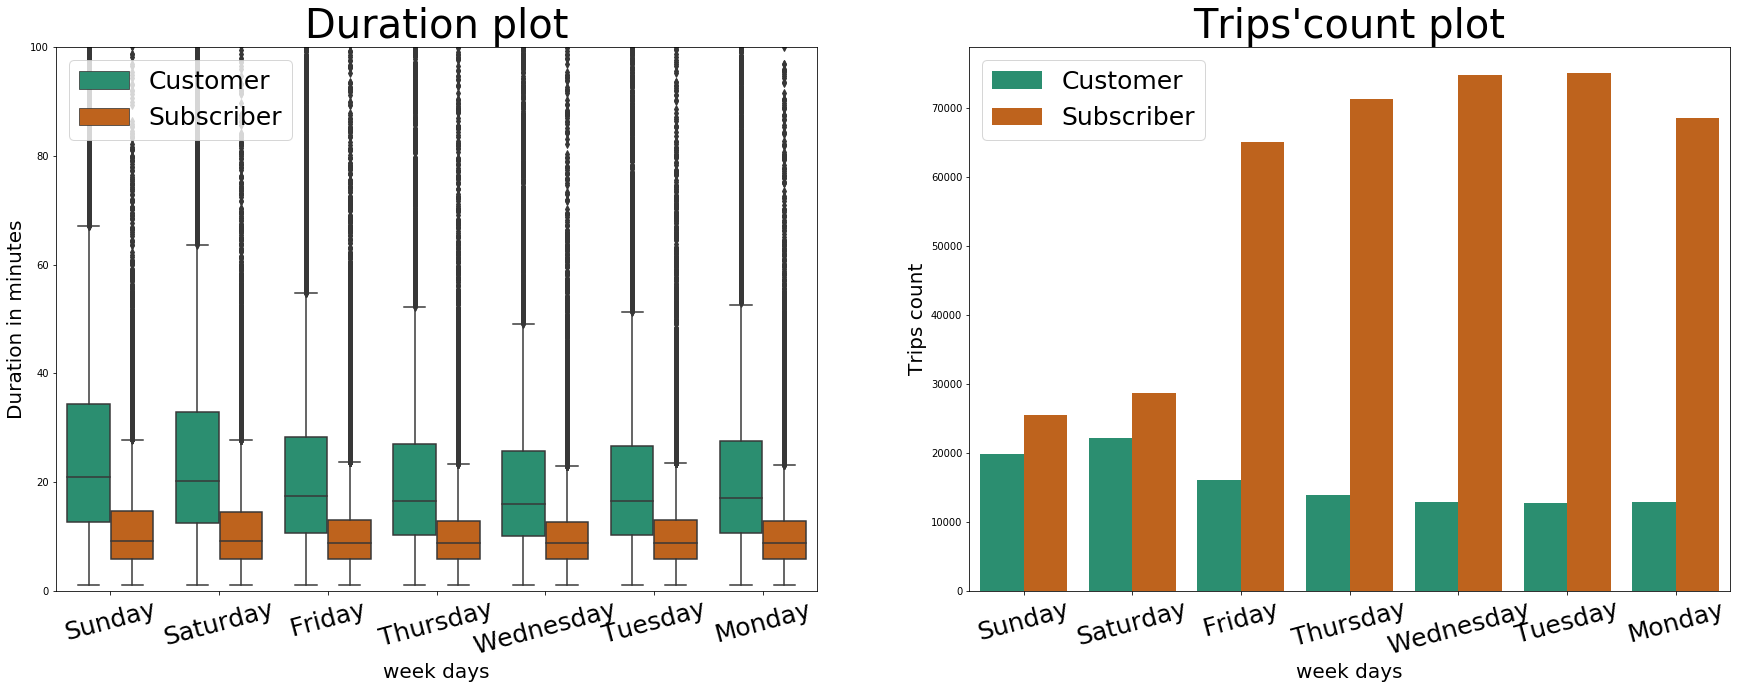

In [18]:
## Initiating a plot

plt.figure(figsize = [30, 10]);

## Fisrt subplot:
plt.subplot(1, 2, 1);
sb.boxplot(data = df, x= 'start_day', y= 'duration_minutes',hue='user_type', palette = 'Dark2');
plt.legend( framealpha = 1, title = 'User_type');
plt.title('Duration plot',fontsize = 40);
plt.ylim((0,100));
plt.xticks(fontsize=25, rotation = 15);
plt.ylabel('Duration in minutes',fontsize = 20);
plt.xlabel('week days', fontsize = 20);
plt.legend(loc=2, prop={'size': 25});

## Second subplot
plt.subplot(1, 2, 2 );
ax = sb.countplot(data = df, x = 'start_day', hue = 'user_type',palette = 'Dark2');
ax.legend( framealpha = 1, title = 'User_type');
plt.title("Trips'count plot",fontsize = 40);
plt.ylabel('Trips count',fontsize = 20)
plt.xlabel('week days', fontsize = 20);
plt.legend(loc=2, prop={'size': 25});
plt.xticks(fontsize=25, rotation = 15);

### **What are the effects of user_types on both trip's duration and trip's count on different months?**

#### *This plot gives us the <font color='brown'>same</font>  results and trends  for both duration and trips' count subplots. But It is noteworthy that:*
   
   1) In <font color='blue'>June</font>, The durations of non-subscribers rides are much higher than other months. 
   
   2) Trips' count reached its <font color='blue'>peak in October</font> then started to fall again as winter was coming.

In [22]:

! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle.tpl


[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 483834 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\VGA\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\VGA\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\VGA\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\VGA\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\VGA\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users